## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 9
---------------------------------------

GOALS:

1. Import a messy DataFrame and fix it
2. Try a pivot
3. Play around with more advanced graphing and plotting

----------------------------------------------------------

This homework has **5 questions** and **2 exercises**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


## Announcements

**Next week - Data Ethics** You should have some resources (book or 3-4 articles) about some area of data science ethics/impacts.

## Day 9 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day9 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day9-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Data Science Visualization - from start to finish

Today we will do a fill analysis where we will import data, do some data cleaning (recoding), and then walk through how to create a really beautiful visualization. 

Survey of religious traditions and income.

Source: [pewforum.org/religious-landscape-study/income-distribution](https://www.pewforum.org/religious-landscape-study/income-distribution/), Retrieved 14 April, 2020

This data is saved in a .xlsx file that is in the data folder that you downloaded.

To use pd.read_excel() we need to download the openpyxl package:

In [2]:
!conda install -y openpyxl

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.1.2
    latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openpyxl-3.1.5             |  py311h03bb54d_1         656 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         656 KB

The following NEW packages will be INSTALLED:

  openpyxl           conda-forge/osx-64::openpyxl-3.1.5-py311h03bb54d_1 



                                                                                
Preparing transaction: done
Ver

In [14]:
file_name = 'data/relig-income.xlsx'
df = pd.read_excel(file_name)

In [15]:
df.head()

,Religious tradition,"Less than $30,000","$30,000-$49,999","$50,000-$99,999","$100,000 or more",Sample Size
0,Buddhist,0.36,0.18,0.32,0.13,233
1,Catholic,0.36,0.19,0.26,0.19,6137
2,Evangelical Protestant,0.35,0.22,0.28,0.14,7462
3,Hindu,0.17,0.13,0.34,0.36,172
4,Historically Black Protestant,0.53,0.22,0.17,0.08,1704


**Q1** Describe the data you see here. How many variables and observations. What are the data types? What are the units?

In [20]:
print('Variables:',df.shape[0])
print('Observations:',df.shape[1])
print('')
print('Data Types:')
df.info()
print('')
print('Units are in dollars($).')

Variables: 12
Observations: 6

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Religious tradition  12 non-null     object 
 1   Less than $30,000    12 non-null     float64
 2   $30,000-$49,999      12 non-null     float64
 3   $50,000-$99,999      12 non-null     float64
 4   $100,000 or more     12 non-null     float64
 5   Sample Size          12 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 708.0+ bytes

Units are in dollars($).


**Q2** Following along with the lecture, say in words what each section of the code below does:

**(Click here to answer each one)**

* **Section 1** - '.rename()': Renames the columns given the argument(s)'columns = {'old':'new'}. Inplace = True means we want to alter the original dataset.
* **Section 2** - 'pd.melt()': Creates an unpivoted dataset where it groups obvervations by the argument 'id_vars = []' labelled as the identifiers. The values and variables assigned are identified as 'var_name = 'income', value_name = 'proportion''.
* **Section 3** - Here we create a new column labelled 'frequency' presenting the number of occurrences (frequency) by multiplying the proportion by the sample size. We then round this number to the nearest integer. 
* **Section 4** - Here we replace the '$' with a blank space '' using the .apply method in the income column. However, I am not sure the importance of the 'lambda' argument.
* **Section 5** - .reset_index(): This resets the index on the far left to 0 and there on.
* **Section 6** - .replace(): We created objects with the name we want to change in the 'religion' column and the name we want to replace it with. We then use the replace method to replace them. 
* **Section 7** - .replace(): We do the same as in section 6 for another religious group.
* **Section 8** - .replace(): Again, we do the same as in section 6 for another religious group.

In [38]:
# Section 1
df.rename(columns={ 'Religious tradition':'religion' ,'Sample Size' : 'n' },inplace=True)
# Section 2
df_new = pd.melt(df, id_vars=['religion','n'], var_name='income', value_name='proportion').sort_values('religion')
# Section 3
df_new['frequency'] = np.round(DF_new['proportion']*DF_new['n'])
# # Section 4
df_new['income'] = DF_new['income'].apply(lambda x: str(x).replace('$',''))
# # Section 5
df_new.reset_index(drop = True, inplace = True)

# Section 6
name_to_change = 'Unaffiliated (religious "nones")'
new_name = 'Unaffiliated'
df_new['religion'] = DF_new['religion'].replace(name_to_change,new_name)

# Section 7
name_to_change =  'Historically Black Protestant'
new_name = 'Hist. Black Protestant'
df_new['religion']=DF_new['religion'].replace(name_to_change,new_name)

# Section 8
name_to_change = 'Evangelical Protestant'
new_name = 'Ev. Protestant'
df_new['religion']=DF_new['religion'].replace(name_to_change,new_name)

df_new.head()

,religion,n,income,proportion,frequency
0,Buddhist,233,"Less than 30,000",0.36,84.0
1,Buddhist,233,"100,000 or more",0.32,312.0
2,Buddhist,233,"50,000-99,999",0.13,59.0
3,Buddhist,233,"Less than 30,000",0.18,29.0
4,Catholic,6137,"50,000-99,999",0.36,75.0


## Make a Bar Plot


## There are SO MANY CUSTOMIZATION OPTIONS!

You are not expected to have all of these options memorized. You should just know that these things are possible and then look up examples for how to do fancier things. I always start simple and then add on from there.

## Final Plot

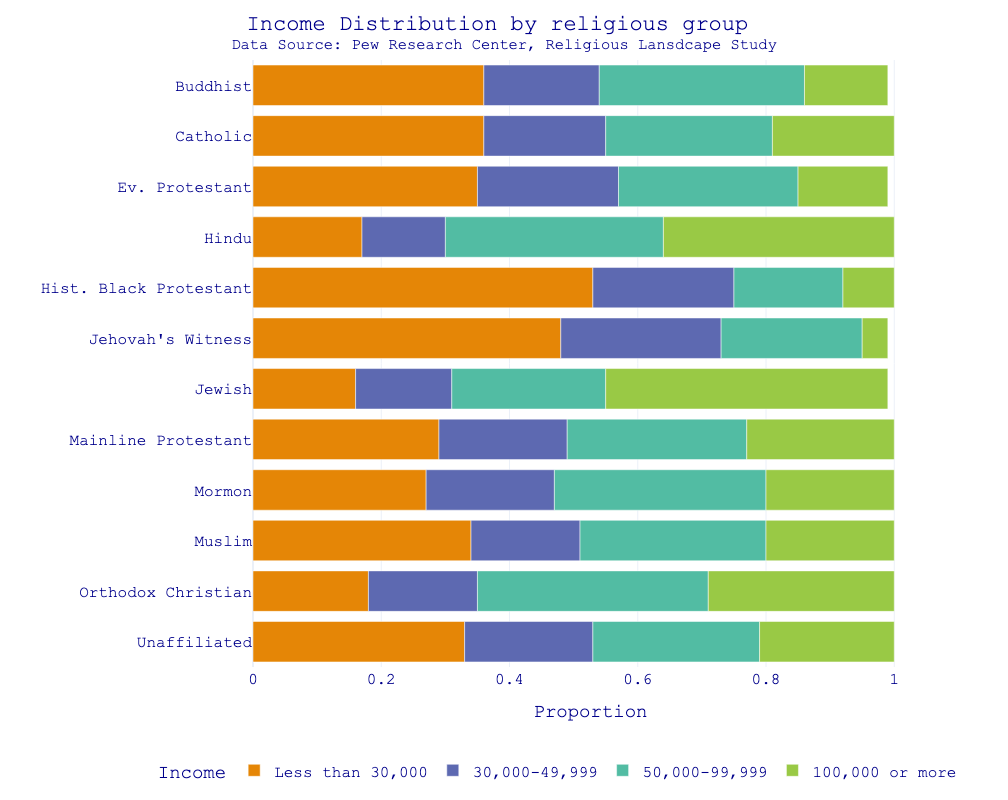

In [39]:
fig = px.bar(DF_new,
             y = 'religion',
             x = 'proportion',
             color = 'income',
             color_discrete_sequence = px.colors.qualitative.Vivid,
             category_orders = {'income' : ['Less than 30,000', '30,000-49,999', '50,000-99,999', '100,000 or more']})

fig.update_layout(template = "plotly_white",
                  title = 'Income Distribution by religious group <br><sup>Data Source: Pew Research Center, Religious Lansdcape Study</sup>',
                  title_x = 0.5,
                  yaxis = {'categoryorder': 'category descending'},
                  xaxis_title = "Proportion",
                  yaxis_title = "",
                  legend_title = 'Income',
                  legend={'orientation':"h",'yanchor':"bottom",'y':-0.2, 'xanchor':"right",'x':1.05},
                  font={'family':"Courier New, monospace",'size':16,'color':"Darkblue"},
                  autosize=False,
                  width=1000,
                  height=800)

fig.show()

## Exercise 1

Make your own version of the plot above. Here are some changes you should try:

* Change the font family - some common fonts to try:
  
        ["Arial",
        "Balto",
        "Courier New",
        "Droid Sans",
        "Droid Serif",
        "Droid Sans Mono",
        "Gravitas One",
        "Old Standard TT",
        "Open Sans",
        "Overpass",
        "PT Sans Narrow",
        "Raleway",
        "Times New Roman"]

* Move the legend to somewhere else.

* Change the template and the color.

* Advanced - look up how you can change the pattern_shape or pattern_shape_sequence. 

## Exercise 2

In this exercise we are going to import some very messy data and see how we can Recode, Tidy, and Pivot the data!

### 1. Import the data from the file: file_name = 'data/sales.xlsx'

Look at the DataFrame, the data is not in a great format. Why is this data not tidy? List a few reasons that this data has problems.


In [85]:
# Your code here
file_name = 'data/sales.xlsx'

df2 = pd.read_excel(file_name,
                    skiprows = range(3))
df2

,Unnamed: 0,Unnamed: 1
0,Brand 1,n
1,1234,8
2,8721,2
3,1822,3
4,Brand 2,n
5,3333,1
6,2156,3
7,3987,6
8,3216,5


**(Click Here to answer questions)**

This is what you should see:

![DataFrame1](images/DF1.png)


### 2. Now we need to fix this data - when we read this in there are some weird things happening.

Open the .sales.xlsx file and look in there. Notice that there are two weird rows at the top. 

How can we read the data in and skip some rows? Try running the command below to read the documentation. Are there any commands that might help us skip the first three rows when reading in the data?


In [69]:
#pd.read_excel?

Try writing your own code that will read in the data, skipping three rows, so that it looks like this:

![DataFrame2](images/DF2.png)



### 3. This is better, but let's rename the columns

In the lecture above we learned how to rename columns. Rename the columns in this DataFrame so that 'Unnamed: 0' becomes 'id' and 'Unnamed: 1' becomes 'n'. Your DataFrame should look like

![DataFrame3](images/DF3.png)

In [86]:
df2.rename(columns = {'Unnamed: 0':'id', 'Unnamed: 1':'n'}, inplace = True)
df2

,id,n
0,Brand 1,n
1,1234,8
2,8721,2
3,1822,3
4,Brand 2,n
5,3333,1
6,2156,3
7,3987,6
8,3216,5


### 4. This is better, but....

This is not yet a tidy data frame. Why not?


**(Your answer here)**

We have strings mixed with numerical values in the 'id' column.


**How do we make it tidy?**

We need to manipulate the data so that we have three columns. The brand, the id, and then the number of sales, but the brand information is mixed up in the id row. We are going to use the following command:

    brand_data = DF['id'].apply(lambda x: x if 'Brand' in str(x) else np.nan)

Tell me what each part of this command does:

a. **df2['id']**: We've selected the 'id' column in our second dataset for the .apply() method.

b. **.apply()**: This method will allow us to apply a function to rows of a single column or multiple. 

c. **lambda x: x if 'Brand' in str(x) else np.nan**: These arguments, along with us selecting the 'id' column previously, will go through each row and determine if the ith row contains the string 'Brand' and mark it as _True_. If the ith row doesn't have this string, it was mark it as _False_. 

- The command **'Brand' in str(x)** will check to see if the word 'Brand' is in each row. This will return True or False.
- To test this try **DF['id'].apply(lambda x: 'Brand' in str(x))** in a separate cell.
- The **if** statement checks to see if **'Brand' in str(x)** is True. If it is true it returns the x (original data). Otherwise it returns **np.nan**
- **np.nan** is how we can get Not a Number.

In [71]:
df2['id'].apply(lambda x: 'Brand' in str(x))

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: id, dtype: bool

**(Your explanation of the command here)**

In [87]:
# Now just run the command
brand_data = df2['id'].apply(lambda x: x if 'Brand' in str(x) else np.nan)
brand_data

0    Brand 1
1        NaN
2        NaN
3        NaN
4    Brand 2
5        NaN
6        NaN
7        NaN
8        NaN
Name: id, dtype: object

### 5. Create a new empty column to store our brand_data

You should know how to add a new column to a data frame. Use the column name 'brand'.


In [88]:
# Your code here
df2['brand'] = brand_data
df2

,id,n,brand
0,Brand 1,n,Brand 1
1,1234,8,NaN
2,8721,2,NaN
3,1822,3,NaN
4,Brand 2,n,Brand 2
5,3333,1,NaN
6,2156,3,NaN
7,3987,6,NaN
8,3216,5,NaN


### 6. Lets fill up those NaNs with the brand information

The command **.ffill()** works like magic! It goes down the column and will fill any NaNs with the information from the cells above, until it gets to another good value. Check out what this command does!

```{python}
DF=DF.ffill()
```

Your data frame should look like

![DataFrame4](images/DF4.png)

In [89]:
# Your code here (copy and paste)
df2 = df2.ffill()
df2

,id,n,brand
0,Brand 1,n,Brand 1
1,1234,8,Brand 1
2,8721,2,Brand 1
3,1822,3,Brand 1
4,Brand 2,n,Brand 2
5,3333,1,Brand 2
6,2156,3,Brand 2
7,3987,6,Brand 2
8,3216,5,Brand 2


### 7. Finally mask out the rows that have bad 'id'

Create a mask using 

    mask = DF['id'].apply(lambda x:'Brand' not in str(x) )

then apply that mask to get

![DataFrame5](images/DF5.png)

In [90]:
# Your code here
mask = df2['id'].apply(lambda x:'Brand' not in str(x))
df2[mask]

,id,n,brand
1,1234,8,Brand 1
2,8721,2,Brand 1
3,1822,3,Brand 1
5,3333,1,Brand 2
6,2156,3,Brand 2
7,3987,6,Brand 2
8,3216,5,Brand 2


### 7. Now lets pivot!!

Try out the **.pivot()** command. See if you can create a DataFrame that looks like this:

![DataFrame6](images/DF6.png)

    DF_new.pivot(index=???, columns=???,values=???)


This is hard! The lecture notes have hints and answers!

In [91]:
# Your code here
df2[mask].pivot(index = 'id', columns = 'brand', values = 'n').fillna(0)

/var/folders/6f/gxpbyqcd6qb7v_30_myk9r5m0000gp/T/ipykernel_16766/2150271874.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



brand,Brand 1,Brand 2
id,,
1234,8,0
1822,3,0
2156,0,3
3216,0,5
3333,0,1
3987,0,6
8721,2,0
